# **Proyecto 3 - Agrupación de datos sobre obesidad**
**Intengrates del equipo:** 

Oscar Ivan Echeverria Marrugo

Fabian Andrés Parrado Velásquez

Xiomara Grisales Henao 

Javier Callejas Cardozo

# Explicacion breve:
Este conjunto de datos incluye información para la estimación de los niveles de obesidad en individuos de los países de México, Perú y Colombia, basada en sus hábitos alimenticios y condición física. Los datos contienen 17 atributos y 2111 registros, los cuales están etiquetados con la variable de clase NObesity (Nivel de Obesidad), que permite la clasificación de los datos en los valores de Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III. El 77% de los datos se generó de manera sintética utilizando la herramienta Weka y el filtro SMOTE, mientras que el 23% de los datos se recolectó directamente de usuarios a través de una plataforma web.

## **Importación de Librerías**

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score


# 4. Ahora en una celda de código cargue la base ObesityDataSet_raw_and_data_sinthetic.csv determine la cantidad de variables y registros, indique cuales son numéricas y cualitativas y haga un resumen de esa información.

In [90]:
df_obesidad =pd.read_csv("../Datos/ObesityDataSet_raw_and_data_sinthetic.csv")

In [91]:
df_obesidad.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [92]:
# cantidad de variables y registros
df_obesidad.shape

(2111, 17)

In [93]:
df_obesidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# Falta colocar el diccionario de las variables con sus tipos.
Variables Cualitativas (Categorías):
            Gender: Género (ej. "Male", "Female").
            family_history_with_overweight: Historia familiar de sobrepeso (ej. "yes", "no").
            FAVC: Frecuencia de consumo de alimentos con alto contenido calórico (ej. "yes", "no").
            CAEC: Frecuencia de consumo de comida entre comidas (ej. "Sometimes", "Frequently").
            SMOKE: Si la persona fuma (ej. "yes", "no").
            SCC: Control del consumo de calorías (ej. "yes", "no").
            CALC: Frecuencia de consumo de alcohol (ej. "no", "Sometimes", "Frequently").
            MTRANS: Medio de transporte utilizado habitualmente (ej. "Public_Transportation", "Walking").
            NObeyesdad: Clasificación del peso (ej. "Normal_Weight", "Overweight_Level_I").

        Variables Numéricas:
            Age: Edad de la persona (en años).
            Height: Altura de la persona (en metros).
            Weight: Peso de la persona (en kg).
            FCVC: Frecuencia de consumo de vegetales (valor numérico).
            NCP: Número de comidas principales diarias.
            CH2O: Consumo de agua diaria (valor numérico).
            FAF: Frecuencia de actividad física semanal.
            TUE: Tiempo de uso de dispositivos electrónicos en horas.

    Tipos de Variables:
        Cualitativas (Categorías Nominales y Ordinales): Las variables cualitativas permiten describir características o comportamientos, como Gender, family_history_with_overweight, CALC, etc.
        Cuantitativas (Continuas o Discretas): Las variables numéricas (Age, Height, Weight, etc.) permiten cuantificar características de las personas del dataset.

In [ ]:
# Para identificar las variables numéricas
variables_numericas = df_obesidad.select_dtypes(include=['number']).columns

variables_numericas_all = df_obesidad.select_dtypes(include=['number']).columns

# Para identificar las variables cualitativas
variables_cualitativas = df_obesidad.select_dtypes(include=['object']).columns

# Mostrar los resultados
print("Variables numéricas:", variables_numericas)
print("Variables cualitativas:", variables_cualitativas)


Variables numéricas: Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Variables cualitativas: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


Se revisan los 3 primeros y 3 últimos registros del dataset, así también como las columnas, índices, tipos de registros y obtenemos una muestra aleatoria para conocer más los datos a analizar y conocer su comportamiento.

In [95]:
display("primeros 3 registros",df_obesidad.head(3))
display("3 últimos registros",df_obesidad.tail(3))
display("Columnas:",df_obesidad.columns)
display("Índices:",df_obesidad.index)
display("Tipos de registros en el DataFrame",df_obesidad.dtypes)
display("Muestra aleatoria de 3 registros",df_obesidad.sample(3))

'primeros 3 registros'

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


'3 últimos registros'

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


'Columnas:'

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

'Índices:'

RangeIndex(start=0, stop=2111, step=1)

'Tipos de registros en el DataFrame'

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

'Muestra aleatoria de 3 registros'

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1732,Male,31.571392,1.767485,120.158049,yes,yes,2.576910,3.0,Sometimes,no,2.080187,no,1.042680,0.376683,Sometimes,Automobile,Obesity_Type_II
482,Female,20.000000,1.580000,53.500000,yes,yes,2.000000,1.0,Frequently,no,2.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1565,Male,30.958051,1.906821,128.856677,yes,yes,2.633855,3.0,Sometimes,no,1.619305,no,1.847802,0.424612,Sometimes,Public_Transportation,Obesity_Type_II


# Resumen:
Cantidad de Variables y Registros: El dataset tiene 2111 filas y 17 columnas. Información del DataFrame (df_obesida.info()):
Total de columnas: 17.
Las columnas tienen 2111 valores no nulos, lo que significa que no hay datos faltantes.
Tipos de datos:
8 columnas son de tipo float64, correspondientes a variables numéricas.
9 columnas son de tipo object, correspondientes a variables cualitativas.

**Variables Numéricas**:
Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE

**Variables Cualitativas**:
Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad

En resumen, el dataset consta de 2111 registros y 17 variables, de las cuales 8 son numéricas y 9 son cualitativas, sin valores nulos en ninguna columna.

# 5. Hagan una exploración manual de la base, identifiquen las variables y los tipos de variables a las que nos enfrentamos y, con su grupo, plantee unas hipótesis frente a las tareas planteadas.
    



In [96]:
df_obesidad.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [97]:
# Identificar valores nulos
display(df_obesidad.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**Posibles Hipótesis:**

Hipótesis 1: Las personas con un historial familiar de sobrepeso (family_history_with_overweight), edad avanzada,NCP: Número de comidas principales diarias y CH2O: Consumo de agua diaria (valor numérico),  tienen mayor probabilidad de presentar sobrepeso u obesidad (NObeyesdad).

Hipótesis 2: El consumo frecuente de alimentos altos en calorías (FAVC) está asociado con un aumento en el nivel de obesidad.

Hipótesis 3: La frecuencia de actividad física (FAF) tiene una correlación negativa con el nivel de obesidad (NObeyesdad), es decir, a mayor actividad física, menor nivel de obesidad.

# 6.Tomen las variables cuantitativas y determinen agrupamientos en la base de datos. No olviden fijar una semilla para la revisión del trabajo. No duden en usar métodos que permitan determinar un valor adecuado de agrupamientos.

# aplicando Kmeans para agrupar por cluster

In [120]:
#variables_cuantitativas = df_obesidad.select_dtypes(include=['number'])
# Lista las columnas numéricas y excluye las dos variables deseadas

columnas_cuantitativas = df_obesidad.select_dtypes(include=['number']).columns.drop(['Height', 'Weight'])
variables_cuantitativas = df_obesidad[columnas_cuantitativas]
variables_cuantitativas



,Age,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...
2106,20.976842,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,3.0,3.0,2.852339,1.139107,0.586035


In [121]:
# Seleccionar las variables cuantitativas del dataset
#variables_cuantitativas = df_obesidad.select_dtypes(include=['number'])

# Normalizar las variables cuantitativas
scaler = StandardScaler()
variables_cuantitativas_scaled = scaler.fit_transform(variables_cuantitativas)

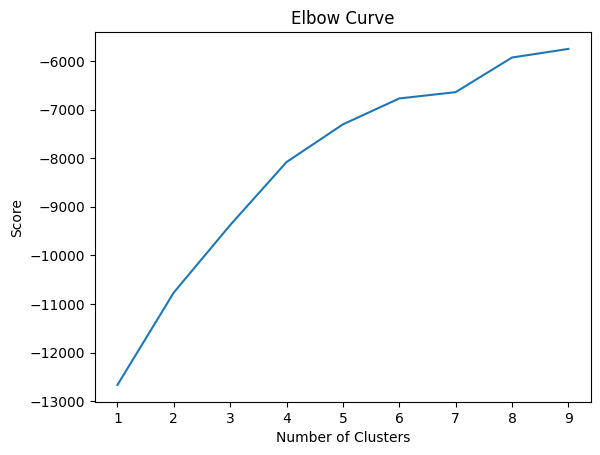

In [122]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(variables_cuantitativas_scaled).score(variables_cuantitativas_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Text(0.5, 1.0, 'K-Means')

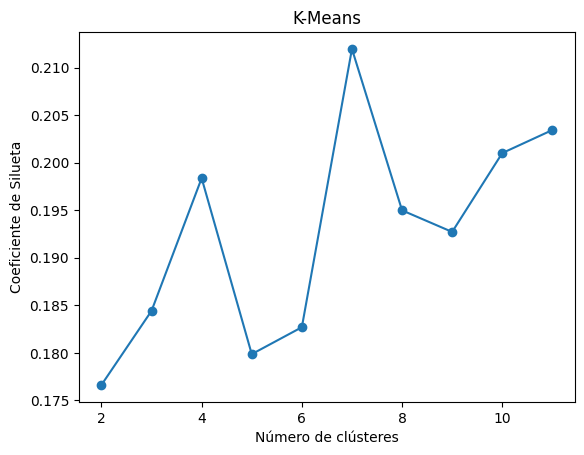

In [123]:
kmeans_silhouette = []
for k in range(10):
    kmeans = KMeans(n_clusters=k+7, random_state=42)
    labels_kmeans = kmeans.fit_predict(variables_cuantitativas_scaled)
    silhouette_kmeans = silhouette_score(variables_cuantitativas_scaled, labels_kmeans)
    kmeans_silhouette.append(silhouette_kmeans)

plt.plot(range(2, 12), kmeans_silhouette, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.title('K-Means')

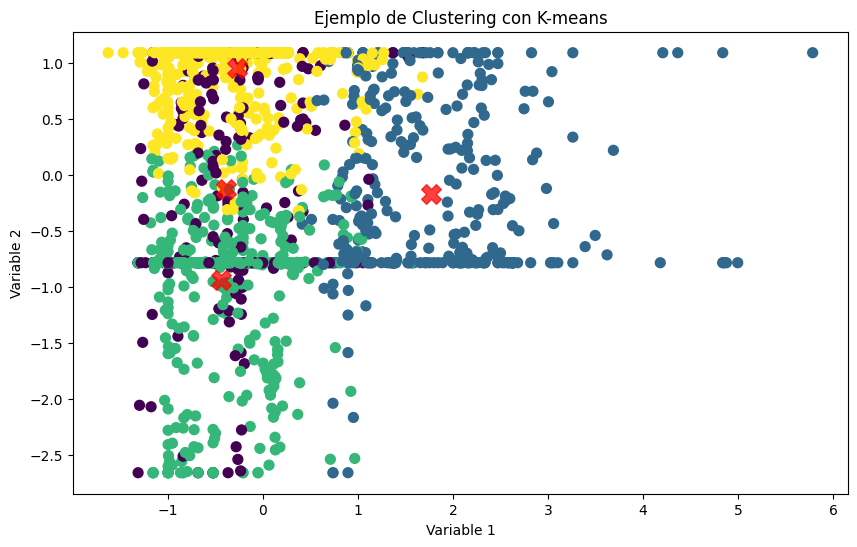

In [124]:
# Aplicación de K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(variables_cuantitativas_scaled)
y_kmeans = kmeans.predict(variables_cuantitativas_scaled)

# Centros de los clusters
centers = kmeans.cluster_centers_

# Visualización de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(variables_cuantitativas_scaled[:, 0], variables_cuantitativas_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Ejemplo de Clustering con K-means')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show()


# PCA

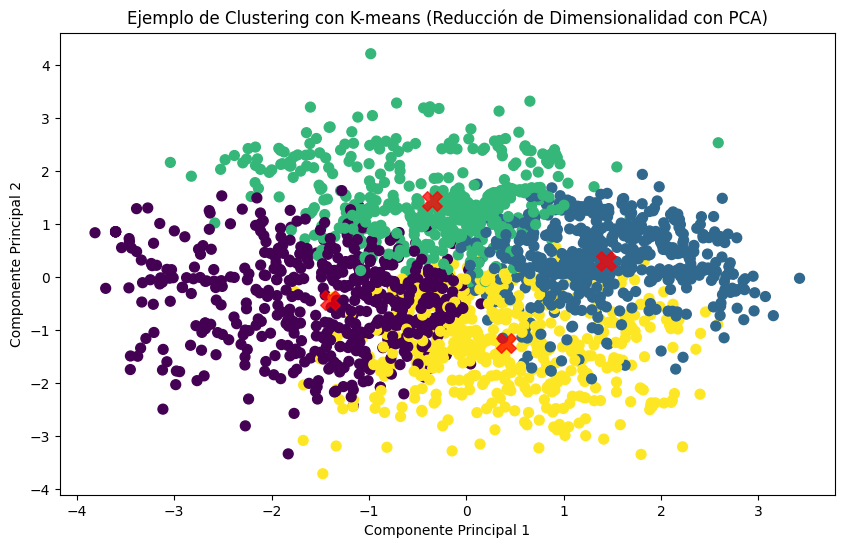

In [126]:
# Seleccionar las variables cuantitativas del dataset
variables_cuantitativas = df_obesidad.select_dtypes(include=['number'])

# Normalizar las variables cuantitativas
scaler = StandardScaler()
variables_cuantitativas_scaled = scaler.fit_transform(variables_cuantitativas)

# Aplicación de K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(variables_cuantitativas_scaled)
y_kmeans = kmeans.predict(variables_cuantitativas_scaled)

# Reducción de dimensionalidad usando PCA
pca = PCA(n_components=2)
variables_pca = pca.fit_transform(variables_cuantitativas_scaled)
centers_pca = pca.transform(kmeans.cluster_centers_)

# Visualización de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(variables_pca[:, 0], variables_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Ejemplo de Clustering con K-means (Reducción de Dimensionalidad con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


# Analsis varaibles categoricas

In [ ]:
df_obesidad_v2 = pd.DataFrame(np.transpose(np.array([df_obesidad['NObeyesdad'], df_obesidad['FAVC']])), columns=['NObeyesdad', 'FAVC'])
df_obesidad_v2.describe()


,NObeyesdad,FAVC
count,2111,2111
unique,7,2
top,Obesity_Type_I,yes
freq,351,1866


In [ ]:
# Seleccionar las columnas categóricas que se desean transformar
df_obesidad_v2 = df_obesidad[['NObeyesdad', 'FAVC']]

# Convertir las columnas categóricas en variables dummy (One-Hot Encoding)
df_obesidad_v2_encoded = pd.get_dummies(df_obesidad_v2)
df_obesidad_v2_encoded.describe()

,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,FAVC_no,FAVC_yes
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,True
freq,1839,1824,1760,1814,1787,1821,1821,1866,1866


In [ ]:
scaler = StandardScaler() 
#DFT = scaler.fit_transform(df_obesidad_v2)
DFT = scaler.fit_transform(df_obesidad_v2_encoded)
#[DFT[:,0].mean(),DFT[:,1].mean(),DFT[:,0].std(),DFT[:,1].std()]
[DFT[:, 0].mean(), DFT[:, 1].mean(), DFT[:, 0].std(), DFT[:, 1].std()]

[2.6927247210235914e-17, 2.6927247210235914e-17, 1.0, 0.9999999999999998]

In [ ]:
#pd.DataFrame(data=DFT,columns=['x_std','y_std']).describe()
pd.DataFrame(data=DFT, columns=[f'var_{i}' for i in range(DFT.shape[1])]).describe
#print(df_DFT.describe())


<bound method NDFrame.describe of          var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0    -0.384586  2.520992 -0.446578 -0.404631 -0.425804 -0.399065 -0.399065   
1    -0.384586  2.520992 -0.446578 -0.404631 -0.425804 -0.399065 -0.399065   
2    -0.384586  2.520992 -0.446578 -0.404631 -0.425804 -0.399065 -0.399065   
3    -0.384586 -0.396669 -0.446578 -0.404631 -0.425804  2.505855 -0.399065   
4    -0.384586 -0.396669 -0.446578 -0.404631 -0.425804 -0.399065  2.505855   
...        ...       ...       ...       ...       ...       ...       ...   
2106 -0.384586 -0.396669 -0.446578 -0.404631  2.348496 -0.399065 -0.399065   
2107 -0.384586 -0.396669 -0.446578 -0.404631  2.348496 -0.399065 -0.399065   
2108 -0.384586 -0.396669 -0.446578 -0.404631  2.348496 -0.399065 -0.399065   
2109 -0.384586 -0.396669 -0.446578 -0.404631  2.348496 -0.399065 -0.399065   
2110 -0.384586 -0.396669 -0.446578 -0.404631  2.348496 -0.399065 -0.399065   

         var_7     var_8  
0 

In [ ]:
DFT

array([[-0.3845861 ,  2.52099201, -0.4465779 , ..., -0.39906536,
         2.75976929, -2.75976929],
       [-0.3845861 ,  2.52099201, -0.4465779 , ..., -0.39906536,
         2.75976929, -2.75976929],
       [-0.3845861 ,  2.52099201, -0.4465779 , ..., -0.39906536,
         2.75976929, -2.75976929],
       ...,
       [-0.3845861 , -0.39666925, -0.4465779 , ..., -0.39906536,
        -0.36234913,  0.36234913],
       [-0.3845861 , -0.39666925, -0.4465779 , ..., -0.39906536,
        -0.36234913,  0.36234913],
       [-0.3845861 , -0.39666925, -0.4465779 , ..., -0.39906536,
        -0.36234913,  0.36234913]])

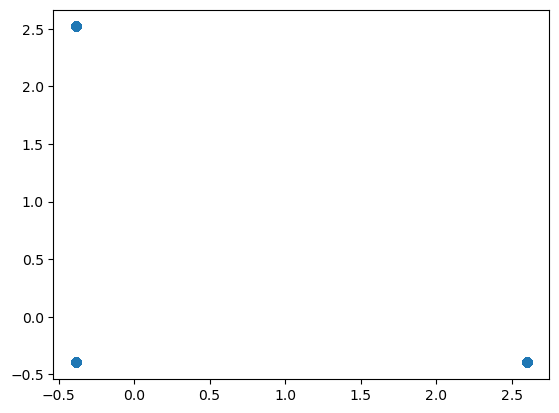

In [ ]:
plt.scatter(DFT.T[0],DFT.T[1])

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(DFT)
DFPC = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
DFPC['3']=0
DFPC

,PC1,PC2,3
0,4.216109,0.001167,0
1,4.216109,0.001167,0
2,4.216109,0.001167,0
3,3.364953,-0.321216,0
4,4.132457,-0.032976,0
...,...,...,...
2106,-0.957093,-1.411902,0
2107,-0.957093,-1.411902,0
2108,-0.957093,-1.411902,0
2109,-0.957093,-1.411902,0


In [ ]:
DFPC.values.T[0]

array([ 4.216109  ,  4.216109  ,  4.216109  , ..., -0.95709349,
       -0.95709349, -0.95709349])

(-1.2157536169521381,
 4.474769125095154,
 -1.5962873725817488,
 2.460201079522391)

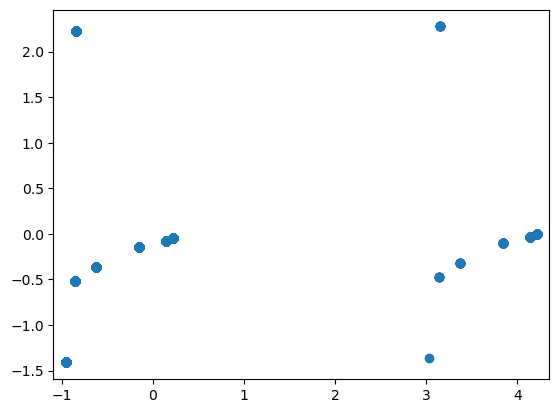

In [ ]:
plt.scatter(DFPC.values.T[0],DFPC.values.T[1])
plt.axis('equal')

(-1.2157536169521381,
 4.474769125095154,
 -0.05500000000000001,
 0.05500000000000001)

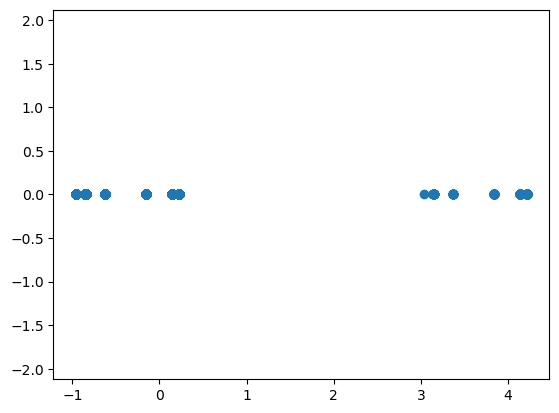

In [ ]:
plt.scatter(DFPC.values.T[0],DFPC.values.T[2])
plt.axis('equal')

# Haciendo otra aplicaciond e PCA

In [ ]:
#print(df_obesidad.dtypes)  # Muestra el tipo de cada columna del DataFrame
#print(type(df_obesidad))   # Muestra el tipo del objeto df_obesidad (DataFrame)
Xe = df_obesidad.values
Xe

array([['Female', 21.0, 1.62, ..., 'Normal_Weight', 0, 0],
       ['Female', 21.0, 1.52, ..., 'Normal_Weight', -1, 0],
       ['Male', 23.0, 1.8, ..., 'Normal_Weight', 0, 1],
       ...,
       ['Female', 22.524036, 1.752206, ..., 'Obesity_Type_III', 0, 1],
       ['Female', 24.361936, 1.73945, ..., 'Obesity_Type_III', 0, 1],
       ['Female', 23.664709, 1.738836, ..., 'Obesity_Type_III', 0, 1]],
      dtype=object)

In [ ]:
df_obesidad_categoricas = df_obesidad.select_dtypes(include=['object'])
df_obesidad_categoricas


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


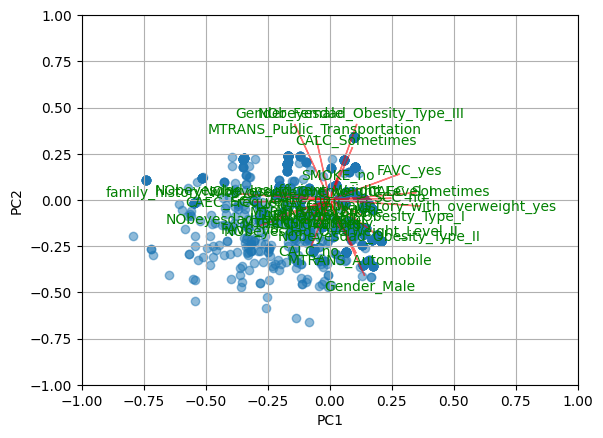

In [127]:
# Seleccionar las variables categóricas del dataset
df_obesidad_categoricas = df_obesidad.select_dtypes(include=['object'])

# Eliminar filas con valores faltantes en las variables categóricas
df_obesidad_categoricas = df_obesidad_categoricas.dropna()

# Convertir las variables categóricas en variables dummy (One-Hot Encoding)
df_obesidad_encoded = pd.get_dummies(df_obesidad_categoricas)

# Normalizar las variables categóricas codificadas
scaler = StandardScaler()
X = scaler.fit_transform(df_obesidad_encoded)

# Aplicación de PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
columnasiris = df_obesidad_encoded.columns

# Función para el biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

# Llamar la función biplot. Usar solo las dos primeras componentes principales
biplot(X_new[:, 0:2], np.transpose(pca.components_[0:2, :]), labels=columnasiris)
plt.show()

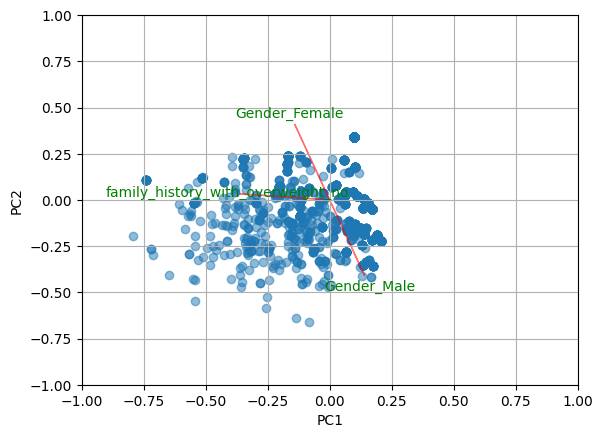

In [128]:



# Seleccionar las variables categóricas del dataset
df_obesidad_categoricas = df_obesidad.select_dtypes(include=['object'])

# Eliminar filas con valores faltantes en las variables categóricas
df_obesidad_categoricas = df_obesidad_categoricas.dropna()

# Convertir las variables categóricas en variables dummy (One-Hot Encoding)
df_obesidad_encoded = pd.get_dummies(df_obesidad_categoricas)

# Normalizar las variables categóricas codificadas
scaler = StandardScaler()
X = scaler.fit_transform(df_obesidad_encoded)

# Aplicación de PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
columnasiris = df_obesidad_encoded.columns

# Seleccionar solo tres variables para mostrar en el biplot
columnasiris_seleccionadas = columnasiris[:3]
pca_components_seleccionados = pca.components_[:2, :3]

# Función para el biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[1]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[0, i], coeff[1, i], color='r', alpha=0.5)
        plt.text(coeff[0, i] * 1.15, coeff[1, i] * 1.15, labels[i], color='g', ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

# Llamar la función biplot usando solo las tres variables seleccionadas
biplot(X_new[:, 0:2], pca_components_seleccionados, labels=columnasiris_seleccionadas)
plt.show()


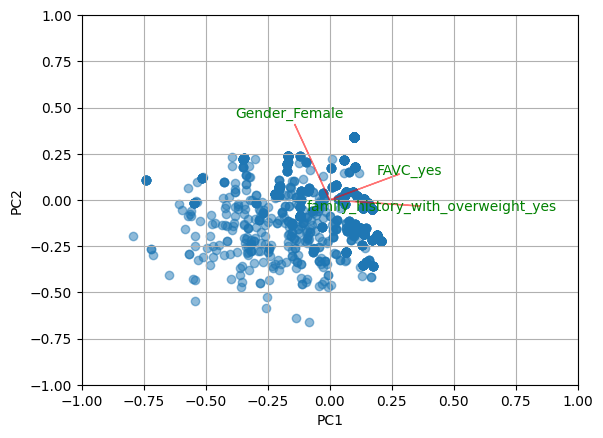

In [129]:
# Seleccionar las variables categóricas del dataset
df_obesidad_categoricas = df_obesidad.select_dtypes(include=['object'])

# Eliminar filas con valores faltantes en las variables categóricas
df_obesidad_categoricas = df_obesidad_categoricas.dropna()

# Convertir las variables categóricas en variables dummy (One-Hot Encoding)
df_obesidad_encoded = pd.get_dummies(df_obesidad_categoricas)

# Normalizar las variables categóricas codificadas
scaler = StandardScaler()
X = scaler.fit_transform(df_obesidad_encoded)

# Aplicación de PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
columnasiris = df_obesidad_encoded.columns

# Especificar las variables que se desean mostrar en el biplot
variables_especificas = ['Gender_Female', 'family_history_with_overweight_yes', 'FAVC_yes']
columnasiris_seleccionadas = [var for var in columnasiris if var in variables_especificas]
indices_seleccionados = [columnasiris.get_loc(var) for var in columnasiris_seleccionadas]
pca_components_seleccionados = pca.components_[:, indices_seleccionados]

# Función para el biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[1]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[0, i], coeff[1, i], color='r', alpha=0.5)
        plt.text(coeff[0, i] * 1.15, coeff[1, i] * 1.15, labels[i], color='g', ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

# Llamar la función biplot usando solo las variables especificadas
biplot(X_new[:, 0:2], pca_components_seleccionados, labels=columnasiris_seleccionadas)
plt.show()


# Aplicación de t-SNE al conjunto de datos

In [133]:
# Datos del dataset de obesidad
X1 = df_obesidad.drop(columns=['NObeyesdad','Height','Weight'])  # Datos de las características, excluyendo la etiqueta
y1 = df_obesidad['NObeyesdad']  # Etiquetas del dataset (NObeyesdad)

# Convertir las variables categóricas en variables dummy (One-Hot Encoding)
X_encoded = pd.get_dummies(X1)

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Mostramos las dimensiones de los datos
print(f"Dimensiones de los datos de las características: {X1.shape}")
print(f"Dimensiones de las etiquetas: {y1.shape}")

Dimensiones de los datos de las características: (2111, 14)
Dimensiones de las etiquetas: (2111,)


In [134]:
# Configuración de t-SNE con 2 componentes
tsne = TSNE(n_components=2, random_state=0)

# Reducción de la dimensionalidad
X_2d = tsne.fit_transform(X_scaled)

In [135]:
# Mostrar las dimensiones resultantes
print(f"Dimensiones después de t-SNE: {X_2d.shape}")

Dimensiones después de t-SNE: (2111, 2)


## Visualización de los Resultados

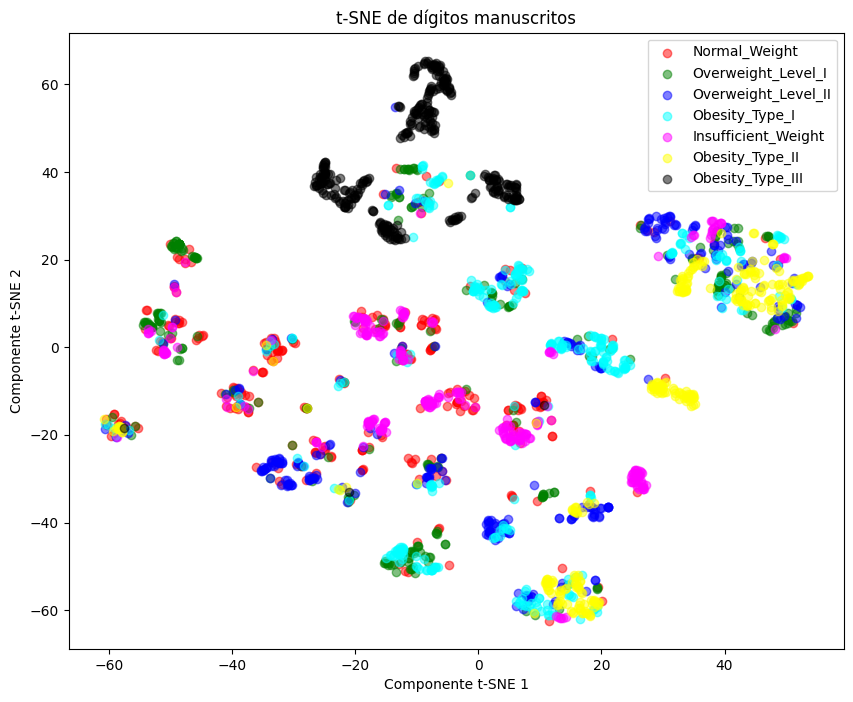

In [136]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(10, 8))

# Colores para cada clase en el dataset de obesidad
unique_classes = y1.unique()  # Obtener las categorías únicas de NObeyesdad
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'darkgrey', 'lime']

# Dibujamos los puntos para cada clase
for i, category in enumerate(unique_classes):
    plt.scatter(X_2d[y1 == category, 0], X_2d[y1 == category, 1], 
                c=colors[i % len(colors)], label=category, alpha=0.5)

# Añadimos la leyenda y los títulos
plt.legend()
plt.title('t-SNE de dígitos manuscritos')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')

# Mostramos el gráfico
plt.show()